<a href="https://colab.research.google.com/github/eunjeechoi/crawling/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [ ]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [ ]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [ ]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* age, cabin, embarked 데이터 누락

In [ ]:
test_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


* fare, cabin, age 누락

In [ ]:
print(train_df.isnull().sum())
print('*'*50)
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
**************************************************
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
def bar_chart(feature):
    survived=train_df[train_df['Survived']==1][feature].value_counts()
    dead=train_df[train_df['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    df.plot(kind='bar',figsize=(20,10))

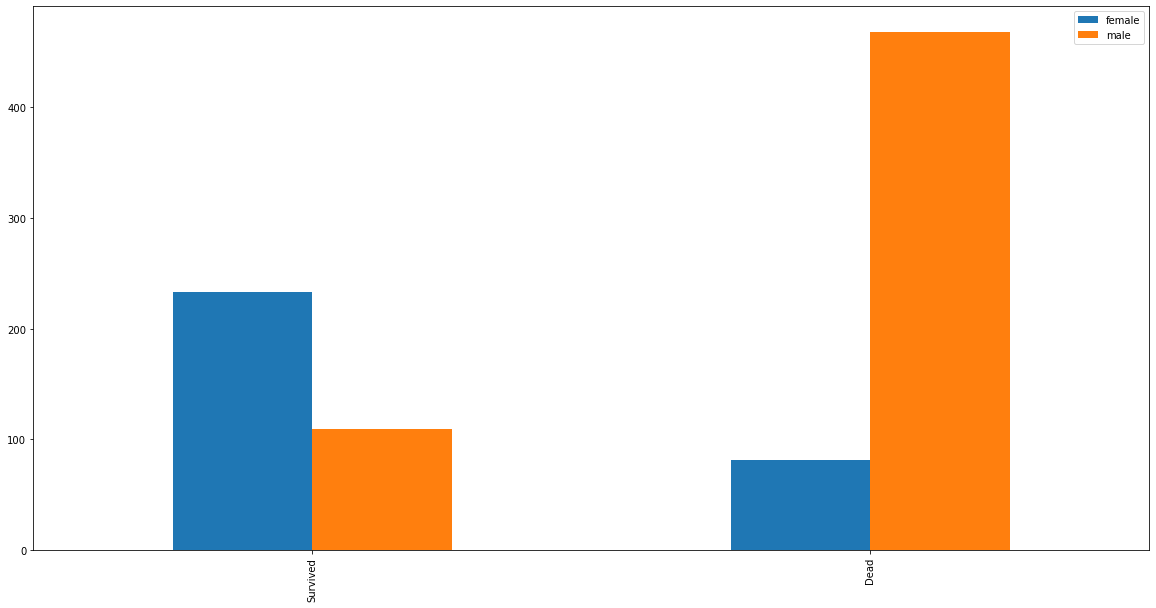

In [ ]:
bar_chart('Sex') 

* 여성이 남자보다 생존한 사람이 많음

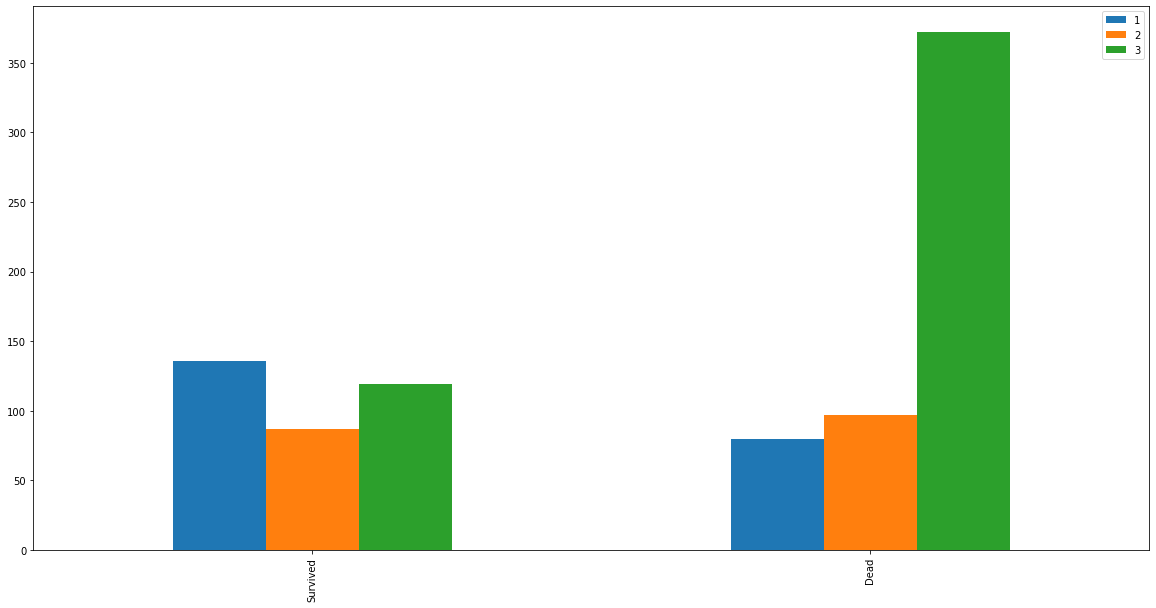

In [ ]:
bar_chart('Pclass')

* 1클래스(퍼스트 클래스)가 다른 클래스들보다 더 생존한 사람이 많은 것을 알 수 있음
* 3클래스는 다른 클래스들에 비해서 사망한 사람이 훨씬 많은 것을 알 수 있음

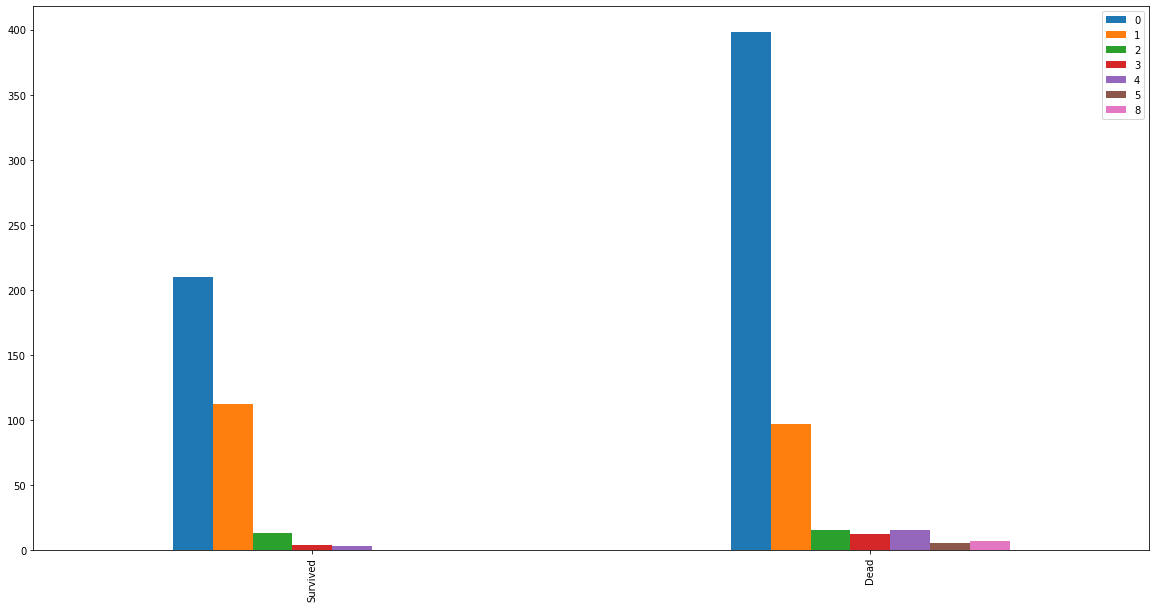

In [ ]:
bar_chart('SibSp')

* 형제/자매 없이 혼자 탑승한 경우 더 많이 사망한 것을 알 수 있음

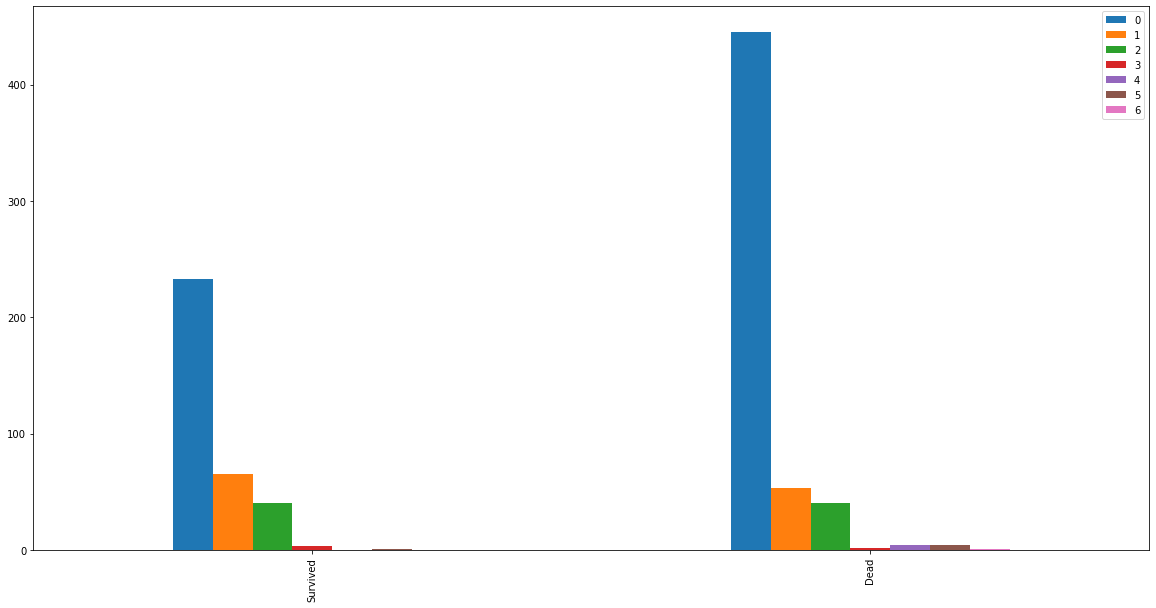

In [ ]:
bar_chart('Parch')

* 부모/자녀가 없이 탑승한 경우 더 많이 사망한 것을 알 수 있음
* 부모/자녀가 있으면서 탑승한 경우 더 많이 생존한 것을 알 수 있음

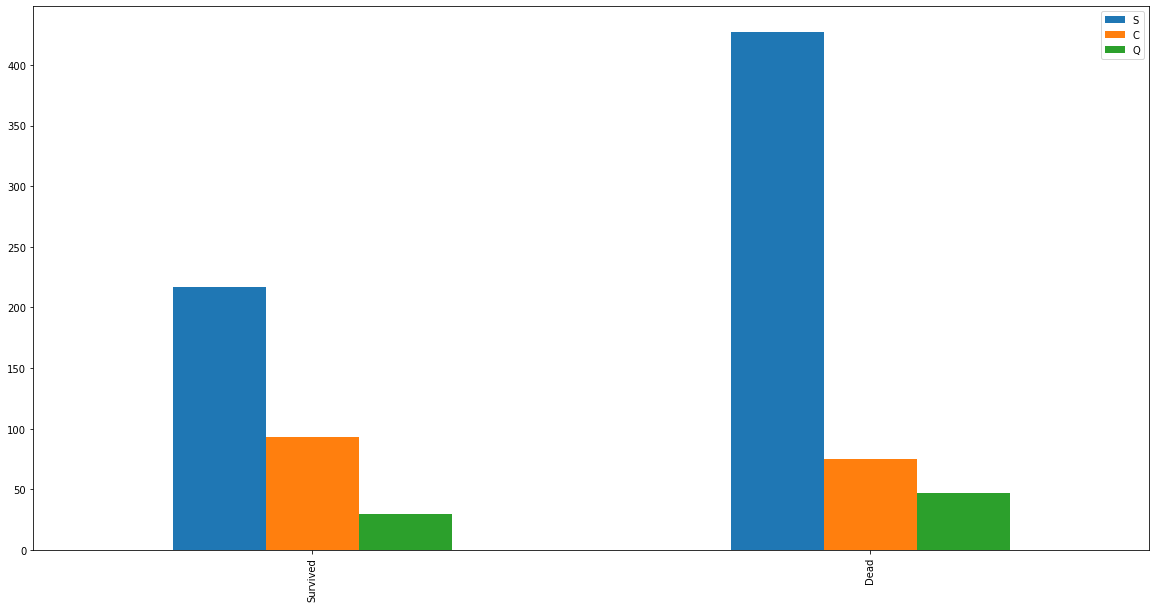

In [ ]:
bar_chart('Embarked')

* S선착장에서는 많이 죽은 것을 알 수 있음
* C선착장은 생존한 사람과 사망한 사람이 비슷한 것을 알 수 있음(생존한 사람이 약간 많음)
* Q선착장은 사망한 사람이 약간 더 많음

# 데이터 전처리

## 1. Name

In [ ]:
combine_df=[train_df,test_df]
for dataset in combine_df:
    dataset['Title']=dataset['Name'].str.extract('([A-Za-z]+)\.')

In [ ]:
train_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Don           1
Ms            1
Sir           1
Countess      1
Capt          1
Jonkheer      1
Lady          1
Mme           1
Name: Title, dtype: int64

In [ ]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [ ]:
title_new={"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 4, "Rev": 4, "Col": 4, "Major": 4, "Mlle": 4,"Countess": 4,
                 "Ms": 4, "Lady": 4, "Jonkheer": 4, "Don": 4, "Dona" : 4, "Mme": 4,"Capt": 4,"Sir": 4 }
for dataset in combine_df:
    dataset['Title']=dataset['Title'].map(title_new)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


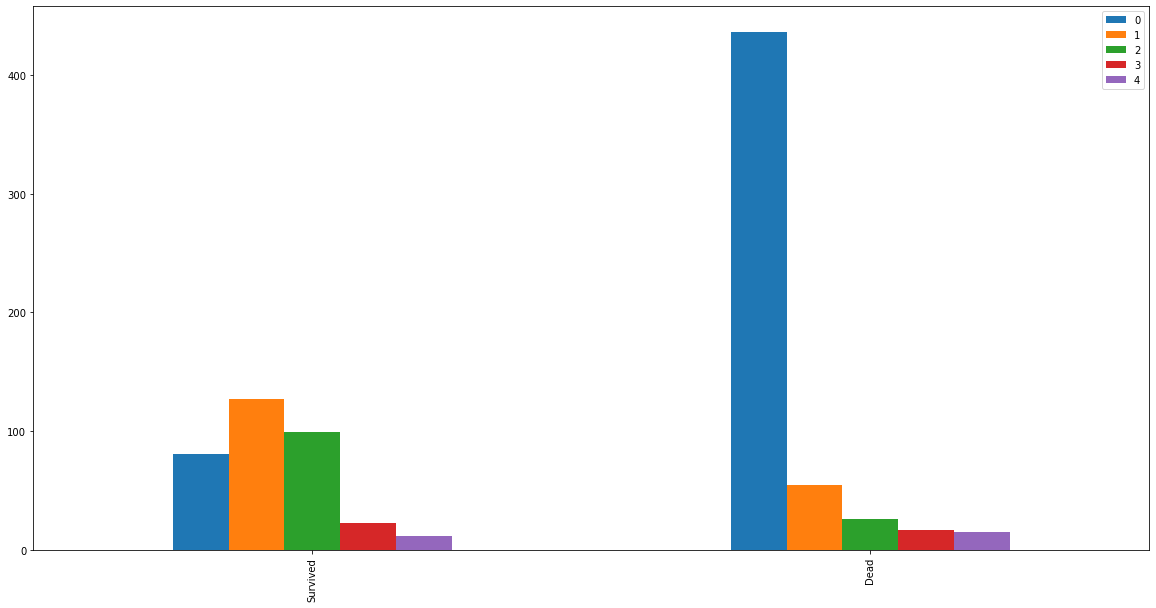

In [ ]:
bar_chart('Title')

* Mr이 가장 많이 사망한 것을 알 수 있음
* Miss, Mrs가 다른 Title들에 비해서 상대적으로 많이 생존할 것을 알 수 있음

In [ ]:
train_df.drop('Name',axis=1,inplace=True)
test_df.drop('Name',axis=1,inplace=True)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


## 2. Sex

In [ ]:
sex_new={"male": 0,"female": 1}
for dataset in combine_df:
    dataset['Sex']=dataset['Sex'].map(sex_new)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,S,4
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,1,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,C,0


In [ ]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,1,39.0,0,0,PC 17758,108.9000,C105,C,4
415,1307,3,0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,0,NaN,0,0,359309,8.0500,NaN,S,0


## 3. Embarked

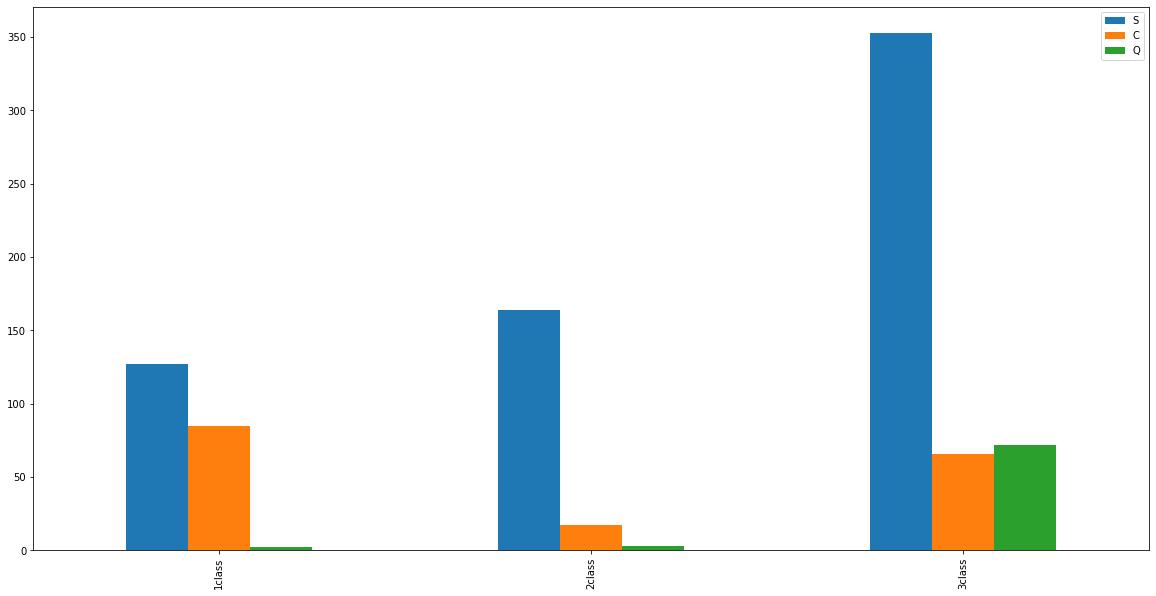

In [ ]:
Pclass_1=train_df[train_df['Pclass']==1]['Embarked'].value_counts()
Pclass_2=train_df[train_df['Pclass']==2]['Embarked'].value_counts()
Pclass_3=train_df[train_df['Pclass']==3]['Embarked'].value_counts()
df=pd.DataFrame([Pclass_1,Pclass_2,Pclass_3])
df.index=['1class','2class','3class']
df.plot(kind='bar',figsize=(20,10))

* 모든 클래스 등급의 사람들은 절반이상이 S항구에서 탑승함
* Q항구에서 탑승한 1클래스,2클래스 사람들은 거의 없는 것을 알 수 있음

In [ ]:
for dataset in combine_df:
    dataset['Embarked']=dataset['Embarked'].fillna('S')
embarked_new={'S':0,'C':1,'Q':2}
for dataset in combine_df:
    dataset['Embarked']=dataset['Embarked'].map(embarked_new)

In [ ]:
print(train_df.isnull().sum())
print('*'*50)
print(test_df.isnull().sum())
train_df

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64
**************************************************
PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,0,4
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,0,1
888,889,0,3,1,NaN,1,2,W./C. 6607,23.4500,NaN,0,1
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,1,0


## 4. Age

In [ ]:
train_df['Age'].fillna(train_df.groupby('Title')['Age'].transform("median"), inplace=True)
test_df['Age'].fillna(test_df.groupby('Title')['Age'].transform("median"), inplace=True)

In [ ]:
train_df['Age'].describe() #사분위수 확인

count    891.000000
mean      29.387957
std       13.262592
min        0.420000
25%       21.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

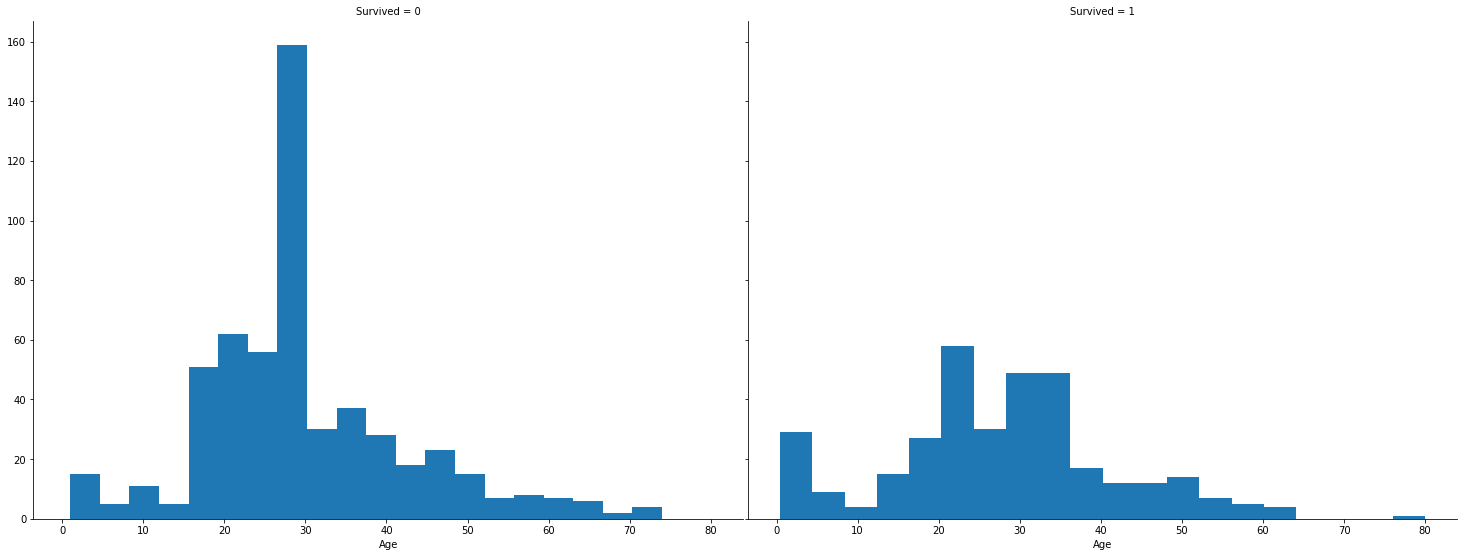

In [ ]:
age_range = sns.FacetGrid(train_df, col='Survived',aspect=10)
# 히스토그램으로 시각화, 연령의 분포를 확인, 히스토그램 bin(구간)을 20개로 설정
age_range.map(plt.hist, 'Age', bins=20)
age_range.fig.set_size_inches(20,10)  

* 5세 이하의 유아가 많이 생존한 것을 알 수 있음
* 15세~30세의 탑승객들이 상대적으로 많이 사망한 것을 알 수 있음

In [ ]:
test_df['Age'].describe()

count    418.000000
mean      30.243635
std       13.027109
min        0.170000
25%       22.000000
50%       30.000000
75%       37.000000
max       76.000000
Name: Age, dtype: float64

In [ ]:
for dataset in combine_df:
    dataset.loc[dataset['Age']<=21,'Age']=0
    dataset.loc[(dataset['Age']<=30)&(dataset['Age']>21),'Age']=1
    dataset.loc[(dataset['Age']<=35)&(dataset['Age']>30),'Age']=2
    dataset.loc[dataset['Age']>35,'Age']=3

In [ ]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,1.0,0,0,211536,13.0000,NaN,0,4
887,888,1,1,1,0.0,0,0,112053,30.0000,B42,0,1
888,889,0,3,1,0.0,1,2,W./C. 6607,23.4500,NaN,0,1
889,890,1,1,0,1.0,0,0,111369,30.0000,C148,1,0


In [ ]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,2,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,0,2
2,894,2,0,3.0,0,0,240276,9.6875,NaN,2,0
3,895,3,0,1.0,0,0,315154,8.6625,NaN,0,0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,0,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,2.0,0,0,A.5. 3236,8.0500,NaN,0,0
414,1306,1,1,3.0,0,0,PC 17758,108.9000,C105,1,4
415,1307,3,0,3.0,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,0
416,1308,3,0,2.0,0,0,359309,8.0500,NaN,0,0


## 5. 사용하지 않을 feature drop시킴

In [ ]:
train_df.drop('Ticket',axis=1,inplace=True)
test_df.drop('Ticket',axis=1,inplace=True)
train_df.drop('Cabin',axis=1,inplace=True)
test_df.drop('Cabin',axis=1,inplace=True)
train_df.drop('PassengerId',axis=1,inplace=True)
test_df.drop('PassengerId',axis=1,inplace=True)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,0,0
1,1,1,1,3.0,1,0,71.2833,1,2
2,1,3,1,1.0,0,0,7.9250,0,1
3,1,1,1,2.0,1,0,53.1000,0,2
4,0,3,0,2.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,0,0,13.0000,0,4
887,1,1,1,0.0,0,0,30.0000,0,1
888,0,3,1,0.0,1,2,23.4500,0,1
889,1,1,0,1.0,0,0,30.0000,1,0


In [ ]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,2.0,0,0,7.8292,2,0
1,3,1,3.0,1,0,7.0000,0,2
2,2,0,3.0,0,0,9.6875,2,0
3,3,0,1.0,0,0,8.6625,0,0
4,3,1,1.0,1,1,12.2875,0,2
...,...,...,...,...,...,...,...,...
413,3,0,2.0,0,0,8.0500,0,0
414,1,1,3.0,0,0,108.9000,1,4
415,3,0,3.0,0,0,7.2500,0,0
416,3,0,2.0,0,0,8.0500,0,0


## 6. Fare

In [ ]:
train_df['Fare'].fillna(train_df.groupby('Pclass')['Fare'].transform('median'),inplace=True)
test_df['Fare'].fillna(train_df.groupby('Pclass')['Fare'].transform('median'),inplace=True)

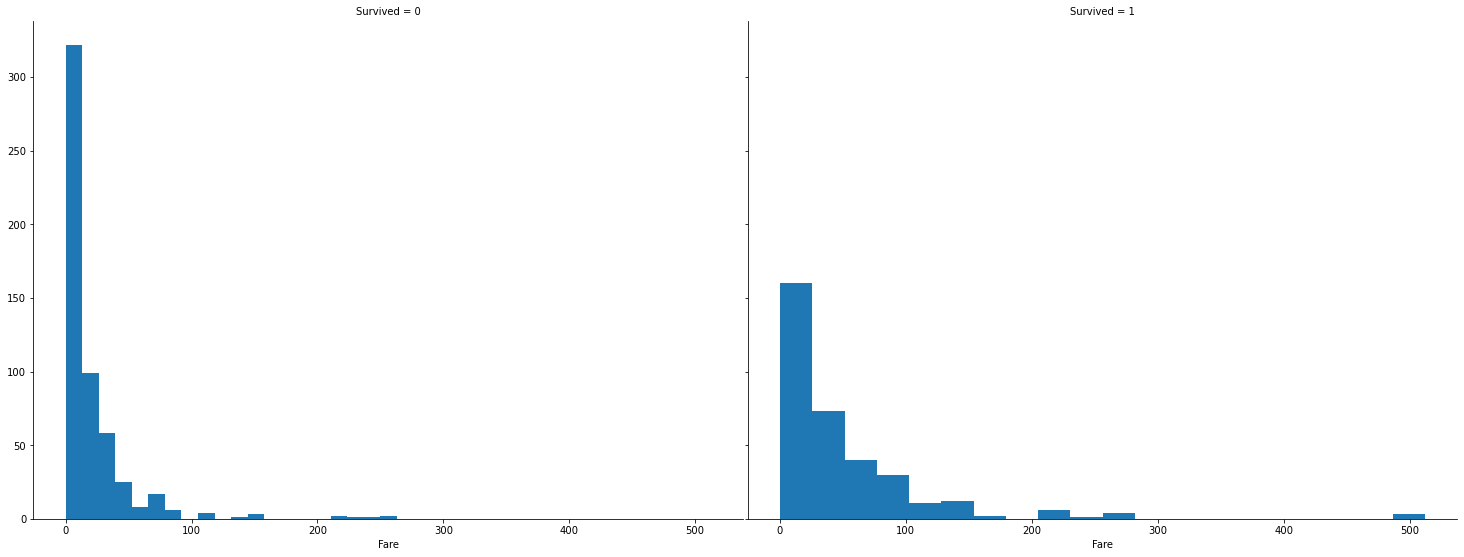

In [ ]:
fare_range= sns.FacetGrid(train_df, col='Survived',aspect=10)
fare_range.map(plt.hist, 'Fare', bins=20)
fare_range.fig.set_size_inches(20,10)  

* 싼 티켓일 수록 상대적으로 더 많은 승객들이 사망한 것을 알 수 있음
* 비싼 티켓일 수록 상대적으로 생존율이 높은 것을 알 수 있음

In [ ]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
test_df['Fare'].describe()

count    418.000000
mean      35.561214
std       55.856789
min        0.000000
25%        7.895800
50%       14.454200
75%       31.471875
max      512.329200
Name: Fare, dtype: float64

In [ ]:
for dataset in combine_df:
    dataset.loc[dataset['Fare']<=7,'Fare']=0
    dataset.loc[(dataset['Fare']<=14)&(dataset['Fare']),'Fare']=1
    dataset.loc[(dataset['Fare']<=31)&(dataset['Fare']>14),'Fare']=2
    dataset.loc[dataset['Fare']>31,'Fare']=3

In [ ]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,1.0,0,0
1,1,1,1,3.0,1,0,3.0,1,2
2,1,3,1,1.0,0,0,1.0,0,1
3,1,1,1,2.0,1,0,3.0,0,2
4,0,3,0,2.0,0,0,1.0,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,0,0,1.0,0,4
887,1,1,1,0.0,0,0,2.0,0,1
888,0,3,1,0.0,1,2,2.0,0,1
889,1,1,0,1.0,0,0,2.0,1,0


## 7. SibSp & Parch

In [ ]:
#혼자 왔으면 0, 같이 왔으면 1
for dataset in combine_df:
    dataset['NoAlone']=dataset['SibSp']+dataset['Parch']
    dataset.loc[dataset['NoAlone']==0,'NoAlone']=0
    dataset.loc[dataset['NoAlone']!=0,'NoAlone']=1

In [ ]:
train_df.drop(['SibSp','Parch'],axis=1,inplace=True)
test_df.drop(['SibSp','Parch'],axis=1,inplace=True)

In [ ]:
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family,NoAlone
0,0,3,0,1.0,1.0,0,0,2,1
1,1,1,1,3.0,3.0,1,2,2,1
2,1,3,1,1.0,1.0,0,1,1,0
3,1,1,1,2.0,3.0,0,2,2,1
4,0,3,0,2.0,1.0,0,0,1,0
5,0,3,0,1.0,1.0,2,0,1,0
6,0,1,0,3.0,3.0,0,0,1,0
7,0,3,0,0.0,2.0,0,3,5,1
8,1,3,1,1.0,1.0,0,2,3,1
9,1,2,1,0.0,2.0,1,2,2,1


In [ ]:
test_df.head(10)

,Pclass,Sex,Age,Fare,Embarked,Title,Family,NoAlone
0,3,0,2.0,1.0,2,0,1,0
1,3,1,3.0,0.0,0,2,2,1
2,2,0,3.0,1.0,2,0,1,0
3,3,0,1.0,1.0,0,0,1,0
4,3,1,1.0,1.0,0,2,3,1
5,3,0,0.0,1.0,0,0,1,0
6,3,1,1.0,1.0,2,1,1,0
7,2,0,1.0,2.0,0,0,3,1
8,3,1,0.0,1.0,1,2,1,0
9,3,0,0.0,2.0,0,0,3,1
